# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. KNN. Exploratory Data Analysis и линейная регрессия


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.



## 1. KNN (4 балла)

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
np.isreal(X).any()

True

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ) 

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# масштабирование признаков
obj = StandardScaler()
X_train_scale = obj.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scale, columns=X_train.columns)

X_test_scale = obj.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scale, columns=X_test.columns)

n_neighbors = [1, 3, 5, 10, 15, 25]
grid_searcher = []
num = 0
for i in n_neighbors:
    grid_searcher.append(GridSearchCV(KNeighborsClassifier(),
                             param_grid={'n_neighbors': [i],'p': [2]}))

    grid_searcher[num].fit(X_train[['alcohol', 'magnesium']], y_train);
    
    print(f'n_neighbors = {i}')
    best_predictions1 = grid_searcher[num].predict(X_train[['alcohol', 'magnesium']])
    accuracy1 = sklearn.metrics.accuracy_score(y_train, best_predictions1)
    print("Доля верных ответов в сравнении с тренировочной выборкой:\t" , accuracy1)

    best_predictions2 = grid_searcher[num].predict(X_test[['alcohol', 'magnesium']])
    accuracy2 = sklearn.metrics.accuracy_score(y_test, best_predictions2) # доля верных верных ответов в сравнении с тестовой выборкой
    print("Доля верных ответов в сравнении с тестовой выборкой:\t\t" , accuracy2)
    print()
    num +=1


n_neighbors = 1
Доля верных ответов в сравнении с тренировочной выборкой:	 0.9919354838709677
Доля верных ответов в сравнении с тестовой выборкой:		 0.7222222222222222

n_neighbors = 3
Доля верных ответов в сравнении с тренировочной выборкой:	 0.8387096774193549
Доля верных ответов в сравнении с тестовой выборкой:		 0.7407407407407407

n_neighbors = 5
Доля верных ответов в сравнении с тренировочной выборкой:	 0.8064516129032258
Доля верных ответов в сравнении с тестовой выборкой:		 0.7407407407407407

n_neighbors = 10
Доля верных ответов в сравнении с тренировочной выборкой:	 0.8064516129032258
Доля верных ответов в сравнении с тестовой выборкой:		 0.7777777777777778

n_neighbors = 15
Доля верных ответов в сравнении с тренировочной выборкой:	 0.782258064516129
Доля верных ответов в сравнении с тестовой выборкой:		 0.7777777777777778

n_neighbors = 25
Доля верных ответов в сравнении с тренировочной выборкой:	 0.7258064516129032
Доля верных ответов в сравнении с тестовой выборкой:		 0.72

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

#!pip install mlxtend;

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1.5 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

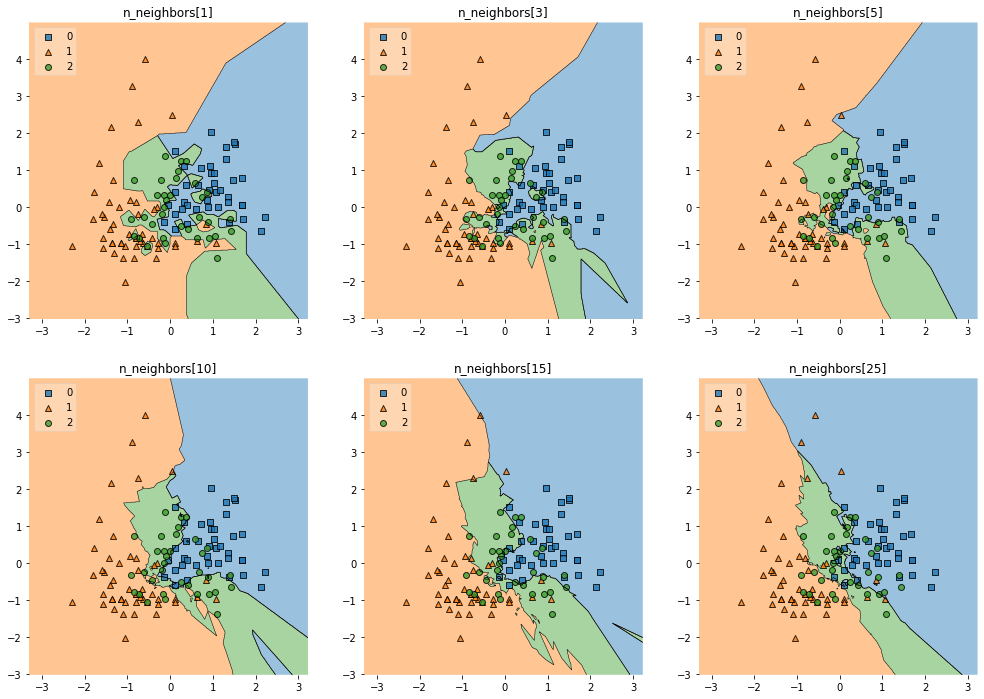

In [9]:
gs = gridspec.GridSpec(2, 3)
X_scale = obj.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_scale, columns=X.columns)
X_train_scaled = X_train[['alcohol', 'magnesium']].to_numpy()


fig = plt.figure(figsize=(17,12))

for clf, grd in zip(grid_searcher, itertools.product([0, 1, 2], repeat=1) ):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_scaled, y_train, clf, legend=2)
    plt.title('n_neighbors' + str(clf.param_grid['n_neighbors']))

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Ответ**: Предположу, что

## 2.Exploratory Data Analysis и линейная регрессия (6 баллов)

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

#!pip install folium

In [10]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

#!pip install opendatasets

In [113]:
# загрузка датаесат
import opendatasets as od
od.download("https://www.kaggle.com/c/nyc-taxi-trip-duration")

Skipping, found downloaded files in ".\nyc-taxi-trip-duration" (use force=True to force download)


In [114]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# распаковочка
import zipfile
with zipfile.ZipFile("nyc-taxi-trip-duration/train.zip", 'r') as zip_ref:
    zip_ref.extractall()
with zipfile.ZipFile("nyc-taxi-trip-duration/test.zip", 'r') as zip_ref:
    zip_ref.extractall()

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [2]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_fresh = pd.read_csv("train.csv")
#X_test = pd.read_csv("test.csv")
X_train_fresh.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
# удаляем dropoff_datetime и преобразуем pickup_datetime
X_train = X_train_fresh.drop(["dropoff_datetime"], axis=1)
X_train['pickup_datetime'] = pd.to_datetime(X_train['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

Text(0, 0.5, 'count')

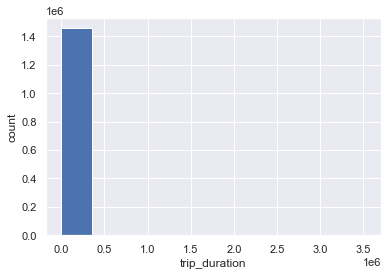

In [4]:
y = X_train['trip_duration'] # 
bins, count = np.histogram(y)
plt.hist(y); # 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'.
plt.xlabel('trip_duration')
plt.ylabel('count')

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
# отбросим хвосты (хоть бы кто намекнул в задании, что нужно избавиться от выбросов)
y = X_train["trip_duration"]

q_low = X_train["trip_duration"].quantile(0.002)
q_hi  = X_train["trip_duration"].quantile(0.998)

y_filtered = X_train[(X_train["trip_duration"] < q_hi) & (X_train["trip_duration"] > q_low)]

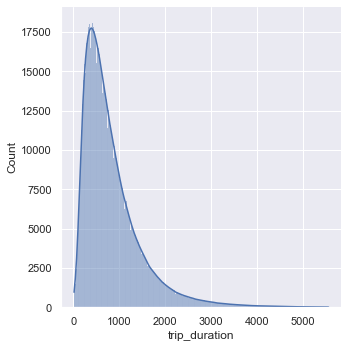

In [102]:
# построим график
sns.displot(y_filtered["trip_duration"], kde=True);

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: По графику выше видно, что распределение целевой переменной похоже на лог-нормальное.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: Из-за влияния выбросов на метрику RMSE.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['log_trip_duration'] = np.log1p(X_train["trip_duration"])
X_train = X_train.drop(["trip_duration"], axis=1)
X_train.head()


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642


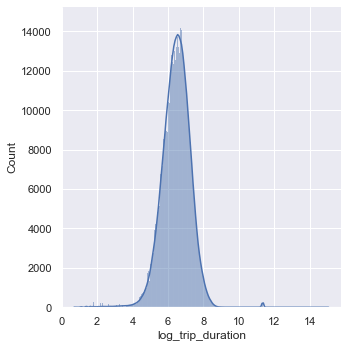

In [20]:
sns.displot(X_train['log_trip_duration'], kde=True);

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [22]:
#X_train.info()

## Часть 1. Изучаем `pickup_datetime` (3 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

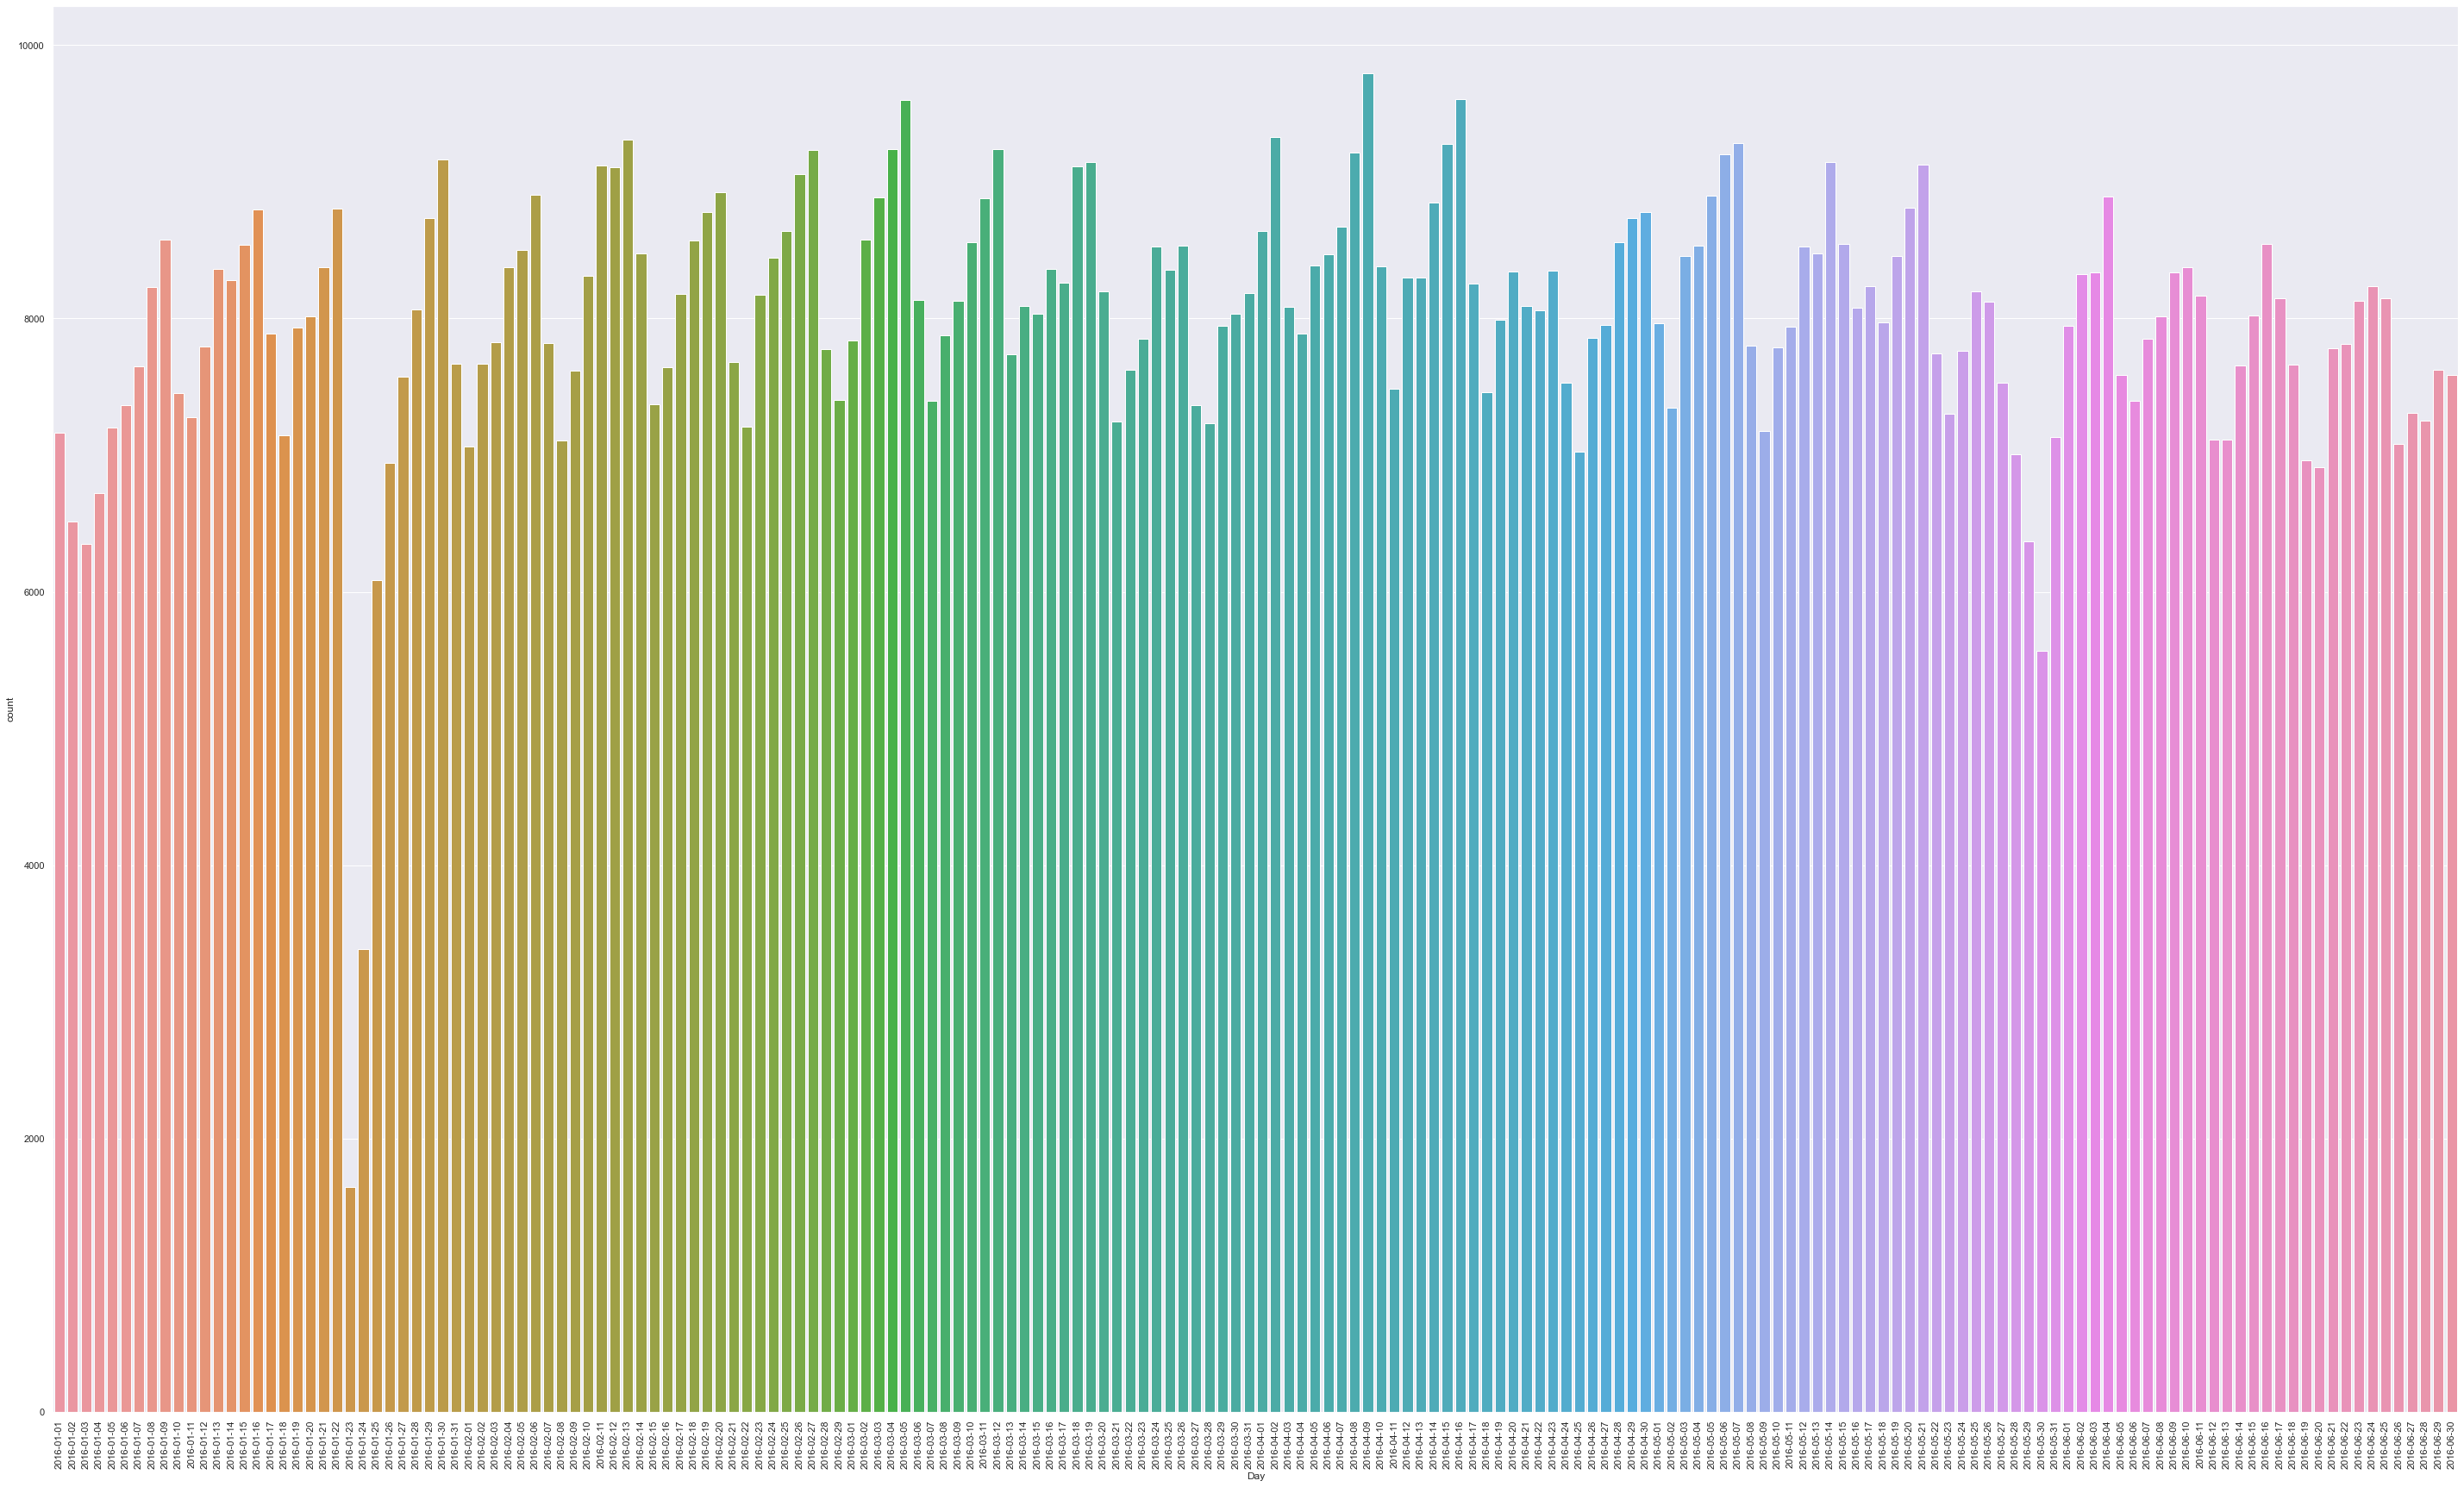

In [7]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['only_date'] = pd.to_datetime(X_train['pickup_datetime']).dt.date
X_train_sorted = X_train.sort_values(by=['only_date'])
fig = plt.figure(figsize=(50,30))
ax = sns.countplot(x=X_train_sorted['only_date'] )
ax.set(xlabel='Day', ylabel='count')
ax.tick_params(axis='x', rotation=90)

plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: Первый аномнальное падение числа поездок было 2016.01.23 (Сильный снегопад, видимо ппоследствия разгребали несколько дней), второй 2016.05.30 сбой компьютера в аэропорту Нью-Йорка.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

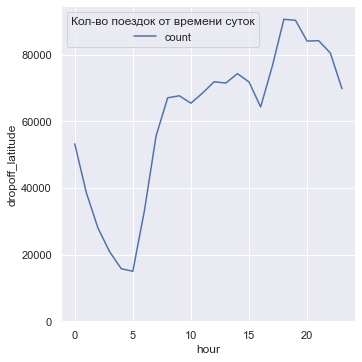

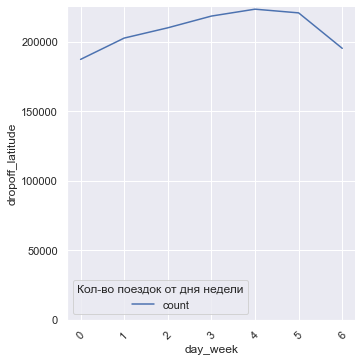

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train['dayofyear'] = pd.to_datetime(X_train['pickup_datetime']).dt.dayofyear
X_train['hour'] = pd.to_datetime(X_train['pickup_datetime']).dt.hour
X_train['month'] = pd.to_datetime(X_train['pickup_datetime']).dt.month
X_train['day_week'] = pd.to_datetime(X_train['only_date']).dt.day_of_week


hour_count = X_train.pivot_table(X_train, index=['hour'], aggfunc='count')
day_hour = X_train.pivot_table(X_train, index=['day_week'], aggfunc='count')


plot1 = sns.relplot(data=hour_count, x="hour", y=hour_count["dropoff_latitude"], kind="line");
plt.legend(title='Кол-во поездок от времени суток', labels=['count']);
plot1.set(ylim=(0, None))

plot2 = sns.relplot(data=day_hour, x="day_week", y=day_hour["dropoff_latitude"], kind="line");
plt.legend(title='Кол-во поездок от дня недели', labels=['count']);
plot2.set(ylim=(0, None))
plt.xticks(rotation=45);

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

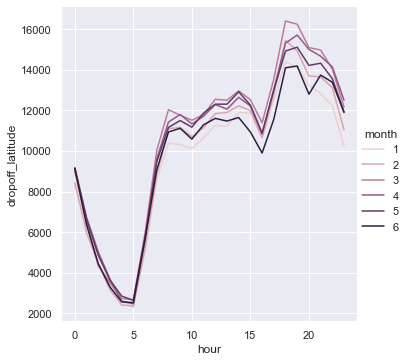

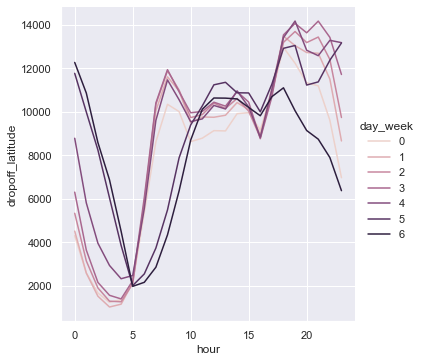

In [10]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
count_hour_month = X_train.pivot_table(X_train, index=['month','hour'], aggfunc='count')
count_hour_day = X_train.pivot_table(X_train, index=['day_week', 'hour'], aggfunc='count')

plt1 = sns.relplot(data=count_hour_month, x="hour", y=count_hour_month["dropoff_latitude"], hue="month", kind="line");
plt2 = sns.relplot(data=count_hour_day, x="hour", y=count_hour_day["dropoff_latitude"], hue="day_week", kind="line");

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**:Да, на графике выше видно, что в утренние часы наблюдается минимум акивности пассажиров такси. В вечернии часы напротив, активность максимальная(18 - 19 часов). Общая тенденция такова, что в тёплое время года кол-во поездок сокращается. Зависимость будних дней имеют общий характер на графике. На общем фоне выделяются: понедельник сниженой активностью с утра и до вечер, выходные дни смещением спроса на графике вверх и вправо.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [15]:
X_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,only_date,dayofyear,hour,month,day_week
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,74,17,3,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,164,0,6,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,19,11,1,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,97,19,4,2
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,86,13,3,5


In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

X_n, test_n = train_test_split(X_train, test_size=0.3)
X_n = X_n.sort_values(by='pickup_datetime')
test_n = test_n.sort_values(by='pickup_datetime')
# display(X_n)

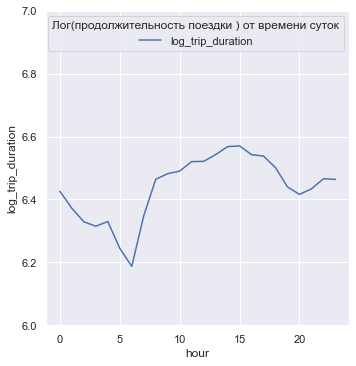

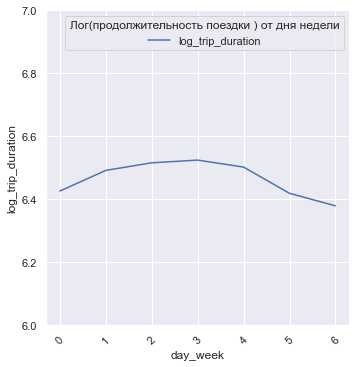

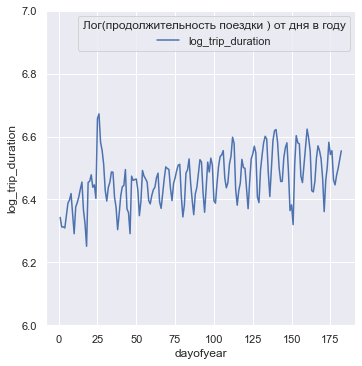

In [12]:
hour_ = X_n.pivot_table(X_n, index=['hour'], aggfunc='mean')

day_ = X_n.pivot_table(X_n, index=['day_week'], aggfunc='mean')

dayofyear_ = X_n.pivot_table(X_n, index=['dayofyear'], aggfunc='mean')


plot1 = sns.relplot(data=hour_, x=hour_.index, y=hour_["log_trip_duration"], kind="line");
plt.legend(title='Лог(продолжительность поездки ) от времени суток', labels=['log_trip_duration']);
plot1.set(ylim=(6, 7))

plot2 = sns.relplot(data=day_, x=day_.index, y=day_["log_trip_duration"], kind="line");
plt.legend(title='Лог(продолжительность поездки ) от дня недели', labels=['log_trip_duration']);
plot2.set(ylim=(6, 7))
plt.xticks(rotation=45);

plot3 = sns.relplot(data=dayofyear_, x=dayofyear_.index, y=dayofyear_["log_trip_duration"], kind="line");
plt.legend(title='Лог(продолжительность поездки ) от дня в году', labels=['log_trip_duration']);
plot3.set(ylim=(6, 7))

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**:Графики похожи. Среднее уменьшается на тех же участках что и абсолютное значение. В аномальные дни среднее увеличивается. Видена тенденция увеличения продолжительности поездки от вермени года.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели **Ответ:**=> добавил ранее
2. Месяц       **Ответ:**=> добавил ранее
3. Час         **Ответ:**=> добавил ранее
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам) **Ответ:** период в пол года - нет, два дня из этого периода - да  (если я правильно понял вопрос о_О)

5. Номер дня в году **Ответ:**=> добавил ранее

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_n.head(8)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,only_date,dayofyear,hour,month,day_week
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,6.745236,2016-01-01,1,0,1,4
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,5.638355,2016-01-01,1,0,1,4
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,6.602588,2016-01-01,1,0,1,4
1116520,id2294362,2,2016-01-01 00:01:33,1,-73.984993,40.773891,-73.936493,40.847771,N,6.569481,2016-01-01,1,0,1,4
404427,id1078247,2,2016-01-01 00:01:37,1,-73.973335,40.764072,-73.974854,40.761734,N,4.744932,2016-01-01,1,0,1,4
475569,id3609443,1,2016-01-01 00:01:47,2,-73.993103,40.752632,-73.953903,40.816540,N,7.094235,2016-01-01,1,0,1,4
1019552,id2914314,2,2016-01-01 00:02:06,1,-73.985443,40.735710,-73.957489,40.811611,N,7.178545,2016-01-01,1,0,1,4
300611,id3675972,2,2016-01-01 00:02:45,1,-73.993736,40.741760,-74.004669,40.745468,N,6.100319,2016-01-01,1,0,1,4


Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**: День недели и часы нужно рассмотреть как категориальные признаки, остальные численные. Потому что на гарфиках выше нет явной линейной зависимости.

**Задание 5 (1.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# вытаскиваем нужные ппризнаки

def make_matrix(df):
    scaler = StandardScaler()
    df[['month','dayofyear']] = scaler.fit_transform(df[['month','dayofyear']])
    X = pd.concat(
        [
            df["day_week"],
            df["month"],
            df["dayofyear"],
            df["hour"]
        ], axis=1, keys=["day_week", "month", "dayofyear","hour" ]
    )
    return X, df["log_trip_duration"]

X_tr, y_tr = make_matrix(X_n)
X_tst, y_tst = make_matrix(test_n)
X_tr.head()


,day_week,month,dayofyear,hour
96469,4,-1.497135,-1.761928,0
652463,4,-1.497135,-1.761928,0
722901,4,-1.497135,-1.761928,0
1116520,4,-1.497135,-1.761928,0
404427,4,-1.497135,-1.761928,0


In [15]:
# Проводим ohe кодирование
ohe = ColumnTransformer([("Hot one", OneHotEncoder(sparse=False),[0,3])], remainder='passthrough')
X_tr = ohe.fit_transform(X_tr)
X_tst = ohe.fit_transform(X_tst)
X_tr.shape

(1021050, 33)

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge().fit(X_tr, y_tr)

mean_squared_error(y_tst, ridge.predict(X_tst))

0.6211123016499766

## Часть 2. Изучаем координаты (2 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [17]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [18]:
show_circles_on_map(X_train_fresh.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

NameError: name 'folium' is not defined

In [199]:
show_circles_on_map(X_train_fresh.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: Две точки высадки(аэропорт Liberty и город Hackensack), аналогов для точек пасадки - нет.


**Задание 6 (1.5 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [34]:
#!pip install haversine

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from haversine import haversine, Unit
from sklearn.metrics.pairwise import haversine_distances
from math import radians

def dist(lat1, lon1, lat2, lon2):   
    d = haversine((lat1, lon1), (lat2, lon2))    
    return d

X_train["haversine"] = X_train.apply(lambda row: dist(row["pickup_latitude"], 
                                               row["pickup_longitude"], 
                                               row["dropoff_latitude"], 
                                               row["dropoff_longitude"]), axis=1)
X_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,only_date,dayofyear,hour,month,day_week,haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,74,17,3,0,1.498523
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,164,0,6,6,1.805510
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,19,11,1,1,6.385107
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,97,19,4,2,1.485500
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,86,13,3,5,1.188590


Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train["log_haversine"] = np.log1p(X_train['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df1 = X_train[["haversine", "log_haversine","log_trip_duration"]]
df1.corr(method ='pearson')

,haversine,log_haversine,log_trip_duration
haversine,1.000000,0.844501,0.573595
log_haversine,0.844501,1.000000,0.749882
log_trip_duration,0.573595,0.749882,1.000000


**Задание 7 (1.5 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

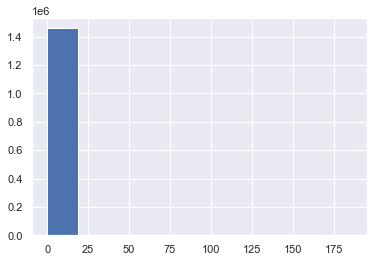

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train["mean_speed"] = X_train['haversine'] / X_train['log_trip_duration']
plt.hist(X_train["mean_speed"]); 


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

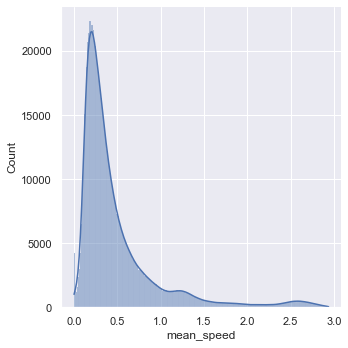

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
y = X_train["mean_speed"]

q_low = X_train["mean_speed"].quantile(0.002)
q_hi  = X_train["mean_speed"].quantile(0.998)

y_filtered = X_train[(X_train["mean_speed"] < q_hi) & (X_train["mean_speed"] > q_low)]
sns.displot(y_filtered["mean_speed"], kde=True);

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<AxesSubplot:xlabel='hour', ylabel='day_week'>

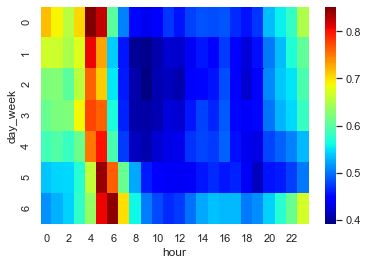

In [42]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from matplotlib import cm

mean_hour_day = X_train.groupby(['day_week', 'hour'])['mean_speed'].mean().unstack()
sns.heatmap(mean_hour_day, cmap='jet')

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?
**Ответ**: Из-за высокой корреляции с временем в пути.

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train = X_train.drop(["mean_speed"], axis=1)
X_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,only_date,dayofyear,hour,month,day_week,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,74,17,3,0,1.498523,0.915700
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,164,0,6,6,1.805510,1.031585
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,19,11,1,1,6.385107,1.999465
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,97,19,4,2,1.485500,0.910474
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,86,13,3,5,1.188590,0.783258


**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.
**Ответ**: Скорость минимальаня в будни около 9:00. Максимальаня скорость в выходные в 4 - 5 утра.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def comp(hour, day_week):
    if day_week in [0,1,2,3]:
        if hour >= 20 and hour <= 6:
            return int(1)
        else:
            return int(0)
    elif day_week in [4,5]:
        if hour >= 0 and hour <=6:
            return int(1)
        else:
            return int(0)
    elif day_week in [6]:
        if hour >= 15 or hour <=6:
            return int(1)
        else:
            return int(0)    

def comp_inv(hour, day_week):
    if day_week in [0,1,2,3]:
        if hour >= 20 and hour <= 6:
            return int(0)
        else:
            return int(1)
    elif day_week in [4,5]:
        if hour >= 0 and hour <=6:
            return int(0)
        else:
            return int(1)
    elif day_week in [6]:
        if hour >= 15 or hour <=6:
            return int(0)
        else:
            return int(1)    
    

X_train["поездка совершается в период свободных дорог"] = 0
X_train["поездка совершается в период пробок"] = 0
X_train["поездка совершается в период свободных дорог"] = X_train.apply(lambda row: comp(row["hour"], row["day_week"]), axis=1)
X_train["поездка совершается в период пробок"] = X_train.apply(lambda row: comp_inv(row["hour"], row["day_week"]), axis=1)

In [65]:
X_train.head(25)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,only_date,dayofyear,hour,month,day_week,haversine,log_haversine,поездка совершается в период свободных дорог,поездка совершается в период пробок
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,2016-03-14,74,17,3,0,1.498523,0.915700,NaN,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,2016-06-12,164,0,6,6,1.805510,1.031585,1.0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,2016-01-19,19,11,1,1,6.385107,1.999465,NaN,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,2016-04-06,97,19,4,2,1.485500,0.910474,NaN,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,2016-03-26,86,13,3,5,1.188590,0.783258,NaN,0
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,6.095825,2016-01-30,30,22,1,5,1.098944,0.741434,NaN,0
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,5.834811,2016-06-17,169,22,6,4,1.326280,0.844271,NaN,0
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,7.347300,2016-05-21,142,7,5,5,5.714989,1.904342,NaN,0
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,5.545177,2016-05-27,148,23,5,4,1.310355,0.837401,NaN,0
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,7.111512,2016-03-10,70,21,3,3,5.121169,1.811753,NaN,0


**Задание 8 (0.5 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Задание 10 (0.5 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Улучшаем модель (бонус 2 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.